In [1]:
# %pip install --upgrade kneed

^C
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import random

## Data generator

We generate fake data that may comes from a merge of our table users and campaign_played.

In [12]:
# our dataset population
nb_users = 50

# range of k cluster you're looking for - minimum 2
k_range = (2, 20)

SCENARIO = [
    "Horror",
    "Romance",
    "Treasure hunting",
    "Sailor",
    "Fantasy",
    "Medieval"
]

NATIONALITY = [
    "France",
    "UK",
    "Spain",
    "Nigeria",
    "Brasil",
    "Cuba"
]

# dataset creation
def build_john_army(size:int) -> list:
    return [f"John{idx}"for idx in range(0,size)]
    
data_users = {
    'name': build_john_army(nb_users),
    'age': np.random.randint(10,50, size=(nb_users)),
    'created_at': pd.date_range('2022-01-01', periods=nb_users),
    'game_played': np.random.randint(0, 50, size=(nb_users)),
    'fav_scenario_kw': [random.choices(SCENARIO, k=3) for _ in range(nb_users)],
    'nationality': random.choices(NATIONALITY, k=nb_users)
}
df_users = pd.DataFrame(data_users)
df_users

,name,age,created_at,game_played,fav_scenario_kw,nationality
0,John0,21,2022-01-01,48,"[Fantasy, Treasure hunting, Sailor]",UK
1,John1,18,2022-01-02,22,"[Treasure hunting, Horror, Horror]",Cuba
2,John2,20,2022-01-03,39,"[Romance, Sailor, Medieval]",Nigeria
3,John3,38,2022-01-04,36,"[Romance, Fantasy, Romance]",Spain
4,John4,26,2022-01-05,4,"[Romance, Treasure hunting, Medieval]",Spain
5,John5,24,2022-01-06,18,"[Horror, Romance, Fantasy]",Nigeria
6,John6,43,2022-01-07,8,"[Fantasy, Medieval, Medieval]",Spain
7,John7,43,2022-01-08,28,"[Sailor, Sailor, Horror]",Brasil
8,John8,34,2022-01-09,38,"[Fantasy, Medieval, Sailor]",Spain
9,John9,48,2022-01-10,46,"[Treasure hunting, Fantasy, Horror]",UK


## encoding categorical data

In [13]:
# split array to columns
scenario_kw_columns =  pd.DataFrame(df_users['fav_scenario_kw'].to_list(), columns = ['fav_scenario_kw1', 'fav_scenario_kw2', 'fav_scenario_kw3'])
df_users = pd.concat([df_users, scenario_kw_columns], axis=1)

# drop columns
df_users = df_users[df_users.columns[~df_users.columns.isin(['fav_scenario_kw', 'created_at', 'name', ])]]
df_users

,age,game_played,nationality,fav_scenario_kw1,fav_scenario_kw2,fav_scenario_kw3
0,21,48,UK,Fantasy,Treasure hunting,Sailor
1,18,22,Cuba,Treasure hunting,Horror,Horror
2,20,39,Nigeria,Romance,Sailor,Medieval
3,38,36,Spain,Romance,Fantasy,Romance
4,26,4,Spain,Romance,Treasure hunting,Medieval
5,24,18,Nigeria,Horror,Romance,Fantasy
6,43,8,Spain,Fantasy,Medieval,Medieval
7,43,28,Brasil,Sailor,Sailor,Horror
8,34,38,Spain,Fantasy,Medieval,Sailor
9,48,46,UK,Treasure hunting,Fantasy,Horror


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# columns encoded
num_attr = ["age","game_played"]
cat_attr = ["nationality", "fav_scenario_kw1", "fav_scenario_kw2", "fav_scenario_kw3"]

# Pipeline for those columns
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
])

shaped_data = full_pipeline.fit_transform(df_users)
shaped_data

<50x26 sparse matrix of type '<class 'numpy.float64'>'
	with 300 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
 }

# A list holds the SSE values for each k (Elbow method: take value of "k" cluster where the plot represesnt an 90° elbow).
# As more centroids(k) are added, the distance from each point to its closest centroid will decrease.
sse = []

for k in range(k_range[0], k_range[1]):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_fit = kmeans.fit(shaped_data)
    sse.append(kmeans.inertia_)


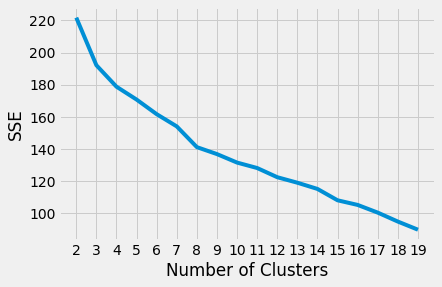

In [17]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(k_range[0], k_range[1]), sse)
plt.xticks(range(k_range[0], k_range[1]))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# from kneed import KneeLocator

# kl = KneeLocator(range(k_range[0], k_range[1]), sse, curve="convex", direction="decreasing")


In [18]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(k_range[0], k_range[1]):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(shaped_data)
    score = silhouette_score(shaped_data, kmeans.labels_)
    silhouette_coefficients.append(score)

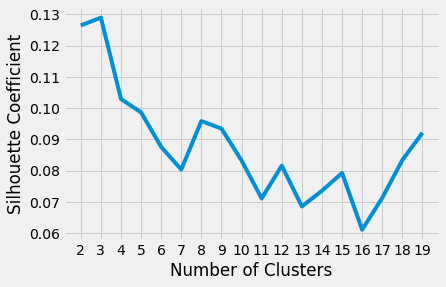

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(k_range[0], k_range[1]), silhouette_coefficients)
plt.xticks(range(k_range[0], k_range[1]))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [22]:

kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(shaped_data)
predictions = kmeans_fit.labels_

cluster_df = df_users
cluster_df['Cluster'] = predictions
cluster_df

,age,game_played,nationality,fav_scenario_kw1,fav_scenario_kw2,fav_scenario_kw3,Cluster
0,21,48,UK,Fantasy,Treasure hunting,Sailor,4
1,18,22,Cuba,Treasure hunting,Horror,Horror,7
2,20,39,Nigeria,Romance,Sailor,Medieval,2
3,38,36,Spain,Romance,Fantasy,Romance,6
4,26,4,Spain,Romance,Treasure hunting,Medieval,16
5,24,18,Nigeria,Horror,Romance,Fantasy,1
6,43,8,Spain,Fantasy,Medieval,Medieval,8
7,43,28,Brasil,Sailor,Sailor,Horror,18
8,34,38,Spain,Fantasy,Medieval,Sailor,4
9,48,46,UK,Treasure hunting,Fantasy,Horror,13


In [23]:
cluster_df['Cluster'].value_counts()

6     5
4     4
8     4
9     4
0     3
16    3
1     3
14    3
10    3
5     2
15    2
11    2
17    2
7     2
18    2
2     2
3     2
12    1
13    1
Name: Cluster, dtype: int64

In [30]:
cluster_df[cluster_df['Cluster'] == 6]
  

,age,game_played,nationality,fav_scenario_kw1,fav_scenario_kw2,fav_scenario_kw3,Cluster
3,38,36,Spain,Romance,Fantasy,Romance,6
28,39,45,Spain,Medieval,Treasure hunting,Sailor,6
29,47,21,Spain,Romance,Fantasy,Sailor,6
32,35,40,UK,Sailor,Fantasy,Romance,6
42,48,33,France,Horror,Fantasy,Romance,6
